In [0]:
#mengimport dataset menggunakan keras
import keras
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

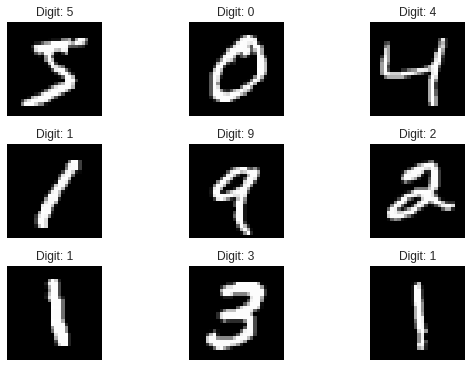

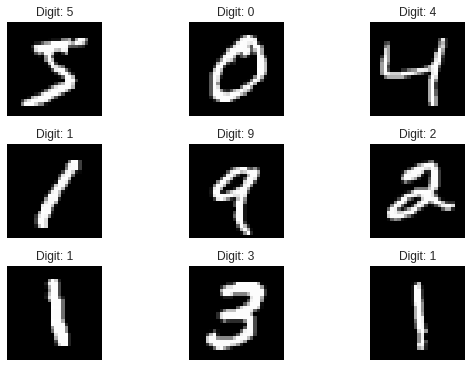

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [0]:
#Melakukan normalisasi terhadap data
rows = 28
col = 28
X_train = X_train.reshape(X_train.shape[0], rows, col, 1)
X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.reshape(X_test.shape[0], rows, col, 1)
X_test = X_test.astype('float32')
X_test /= 255
print('X_train shape:', X_train.shape) 
print('X_test shape:', X_test.shape)

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


In [0]:
import keras
num_category = 10
# konversi class vector ke binary class dengan 10 kategori
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
#import library untuk membuat model CNN
from keras.models import Sequential
from keras.layers import MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Conv2D, BatchNormalization

# Membuat arsitektur CNN
model = Sequential()
# Convolutional layer dengan fungsi aktivasi rectified linear unit (Relu)

# 32 filter convolution dengan ukuran 3x3
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
# 64 filter convolution dengan ukuran 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# Memilih fitur terbaik dengan pooling
model.add(MaxPool2D(pool_size=(2, 2)))
# Menghidupkan dan mematikan neuron untuk meningkatkan konvergensi
model.add(Dropout(0.25))
# Flattening dilakukan karena terlalu banyak dimensinya, hanya memerlukan output klasifikasi
model.add(Flatten())
# Terhubung secara penuh untuk mendapat data yang relevan
model.add(Dense(128, activation='relu'))
# Menggunakan softmax untuk mengubah matrix menjadi output probabilitas
model.add(Dense(num_category, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total para

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()

training_set= train_gen.flow(X_train, y_train, batch_size=64)
test_set= train_gen.flow(X_test, y_test, batch_size=64)

In [0]:
num_epoch = 20
# Training terhadap model CNN
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.1559 - acc: 0.9539 - val_loss: 0.0530 - val_acc: 0.9825
Epoch 2/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.0477 - acc: 0.9853 - val_loss: 0.0393 - val_acc: 0.9868
Epoch 3/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.0316 - acc: 0.9900 - val_loss: 0.0311 - val_acc: 0.9895
Epoch 4/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.0227 - acc: 0.9926 - val_loss: 0.0342 - val_acc: 0.9885
Epoch 5/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.0163 - acc: 0.9947 - val_loss: 0.0361 - val_acc: 0.9886
Epoch 6/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.0132 - acc: 0.9957 - val_loss: 0.0343 - val_acc: 0.9890
Epoch 7/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.0114 - acc: 0.9962 - val_loss: 0.0342 -

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
# Menampilkan score untuk loss dan accuracy validasi
print('Val loss:', score[0]) 
print('Val accuracy:', score[1]) 

Val loss: 0.04252772853549911
Val accuracy: 0.9911


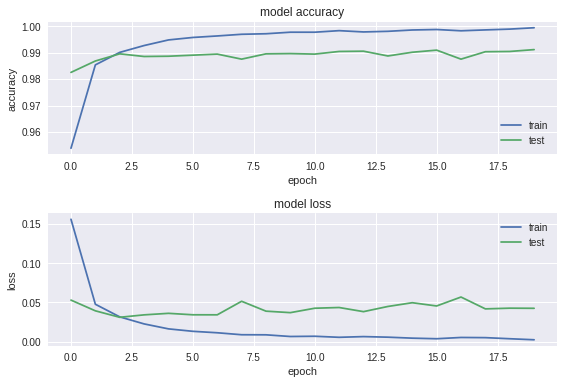

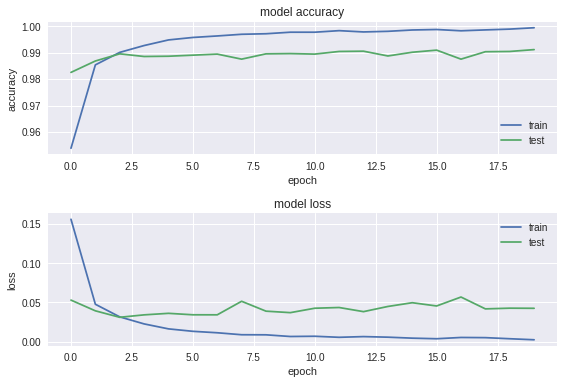

In [0]:
import os
# Menampilkan hasil ke dalam graph
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig